### 대여소 ID, 구 단위 저장

In [1]:
import numpy as np
import pandas as pd


data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')

# 대여소_data = data[['대여소_ID', '주소1']]
대여소_data = data[['대여소_ID', '주소1', '주소2', '위도', '경도']]

대여소_data['구'] = data['주소1'].str.extract(r'(\S+)구')

# 전체 마스터 정보에서 주소1은 '강서'로
강서_master_temp = 대여소_data[대여소_data['구'] == '강서'].reset_index(drop=True)
강서_master_temp.to_csv('강서_master_temp.csv', index=False)

print(강서_master_temp)


# 강서_대여소_ID = 대여소_data.loc[대여소_data['주소1'] == '강서', '대여소_ID'].reset_index(drop=True)
# 강서_대여소_ID_df = pd.DataFrame({'대여소_ID': 강서_대여소_ID})
# 강서_대여소_ID_df_temp = pd.DataFrame({'대여소_ID': 강서_대여소_ID_temp})

# 강서_대여소_ID_df.to_csv('강서_따릉이_대여소_ID.csv', index=False)
# 강서_대여소_ID_df_temp.to_csv('강서_따릉이_대여소_ID_temp.csv', index=False)

# print(강서_대여소_ID)
# print(강서_대여소_ID_temp)

      대여소_ID                          주소1              주소2         위도  \
0     ST-975       서울특별시 강서구 마곡서1로 111-12        신방화역환승주차장  37.567284   
1     ST-837          서울특별시 강서구 강서로 지하 54    강서구 화곡동 662-5  37.532551   
2     ST-836         서울특별시 강서구 곰달래로37길 13    강서구곰달래로37길 13  37.531780   
3     ST-835            서울특별시 강서구 강서로 304  강서구 내발산동 724-42  37.552914   
4     ST-834           서울특별시 강서구 공항대로 329    강서구 등촌동 675-7  37.558197   
..       ...                          ...              ...        ...   
219  ST-1066      서울특별시 서울 강서구 내발산동 741-8   마곡수명산파크2단지 교차로   0.000000   
220  ST-1065          서울특별시 강서구 마곡동 797-5              NaN  37.558949   
221  ST-1064        서울특별시 강서구 마곡동 728-168          마곡역7번출구  37.558311   
222  ST-1063  서울특별시 강서구 공항대로 163 마곡역(5호선)              NaN  37.560207   
223  ST-1062   서울특별시 강서구 공항대로 33 송정역(5호선)              NaN  37.561531   

             경도   구  
0    126.818275  강서  
1    126.846321  강서  
2    126.854485  강서  
3    126.836571  강서  
4    126.8442

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [4]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일
0        2023-02-13     150   ST-1517   ST-1517      1        1        50   0
1        2023-02-13     835   ST-1718   ST-1718      1        1        10   0
2        2023-02-13    1250   ST-2028   ST-2028      1        1        20   0
3        2023-02-13    1815   ST-1506   ST-1506      1        1        10   0
4        2023-02-13    1845   ST-2045   ST-2045      1        1        20   0
...             ...     ...       ...       ...    ...      ...       ...  ..
2345644  2023-12-18    2355   ST-2041   ST-1714      1        5      1020   0
2345645  2023-12-18    2355   ST-1062   ST-1647      1        8      1070   0
2345646  2023-12-18    2355    ST-975    ST-514      1       46      1257   0
2345647  2023-12-18    2355   ST-2871    ST-508      1       13      2246   0
2345648  2023-12-18    2355   ST-2871   ST-1065      1        6       992   0

[2345649 rows x 8 columns]


In [5]:
print(강서_데이터.info())
print(강서_대여소_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345649 entries, 0 to 2345648
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준_날짜      object
 1   기준_시간대     int64 
 2   시작_대여소_ID  object
 3   종료_대여소_ID  object
 4   전체_건수      int64 
 5   전체_이용_분    int64 
 6   전체_이용_거리   int64 
 7   요일         int64 
dtypes: int64(5), object(3)
memory usage: 143.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소_ID  224 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB
None


### (2023 강서구 따릉이 이용량) 데이터와 (따릉이 대여소 마스터 정보) 데이터의 대여소 ID 개수 비교

In [6]:
# 각 파일별 대여소 ID 개수의 차이

print(강서_temp['대여소_ID'].nunique())
print(강서_데이터['시작_대여소_ID'].nunique())

224
194


In [7]:
# 2023년에는 사용하지 않았지만 마스터 정보 파일에는 있는 대여소 ID

강서_temp_remain = 강서_temp[~강서_temp['대여소_ID'].isin(강서_데이터['시작_대여소_ID'])]
강서_temp_remain.to_csv('강서_temp_remain.csv', index=False)
print(강서_temp_remain)

      대여소_ID                                 주소1                 주소2  \
1     ST-837                 서울특별시 강서구 강서로 지하 54       강서구 화곡동 662-5   
2     ST-836                서울특별시 강서구 곰달래로37길 13       강서구곰달래로37길 13   
5     ST-833                 서울특별시 강서구 공항대로59길 8      강서구 등촌동 666-90   
6     ST-832               서울특별시 강서구 방화대로47가길 22      강서구 방화동 830-15   
12    ST-537                   서울특별시 강서구 곰달래로 51              355-48   
20    ST-529                서울특별시 강서구 등촌로51나길 29       강서구 등촌동 520-6   
22    ST-527                   서울특별시 강서구 화곡로 232        강서구 화곡동 94-6   
28    ST-521                서울특별시 강서구 강서로80길 117      강서구 가양동 1459-9   
34    ST-515                   서울특별시 강서구 양천로 200       강서구 마곡동 223-6   
43   ST-3284         서울특별시 강서구 남부순환로 222 서울자동차학원                 NaN   
91   ST-2612                    서울특별시 강서구 양천로452                 NaN   
98   ST-2554          서울특별시 강서구 공항대로 49-2 공항신성빌딩                 NaN   
103  ST-2540              서울특별시 강서구 강서로 191 화평빌딩              강서

In [8]:
len(강서_temp_remain)

30

In [10]:
강서_temp_remain.head(30).reset_index(drop=True)

,대여소_ID,주소1,주소2,위도,경도,주소
0,ST-837,서울특별시 강서구 강서로 지하 54,강서구 화곡동 662-5,37.532551,126.846321,강서
1,ST-836,서울특별시 강서구 곰달래로37길 13,강서구곰달래로37길 13,37.531780,126.854485,강서
2,ST-833,서울특별시 강서구 공항대로59길 8,강서구 등촌동 666-90,37.551666,126.864090,강서
3,ST-832,서울특별시 강서구 방화대로47가길 22,강서구 방화동 830-15,37.577213,126.813553,강서
4,ST-537,서울특별시 강서구 곰달래로 51,355-48,37.530338,126.838257,강서
5,ST-529,서울특별시 강서구 등촌로51나길 29,강서구 등촌동 520-6,37.548061,126.860420,강서
6,ST-527,서울특별시 강서구 화곡로 232,강서구 화곡동 94-6,37.546444,126.845459,강서
7,ST-521,서울특별시 강서구 강서로80길 117,강서구 가양동 1459-9,37.570480,126.849503,강서
8,ST-515,서울특별시 강서구 양천로 200,강서구 마곡동 223-6,37.572781,126.826279,강서
9,ST-3284,서울특별시 강서구 남부순환로 222 서울자동차학원,NaN,37.546135,126.821060,강서


# 일별 대여데이터 시각화

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) miss

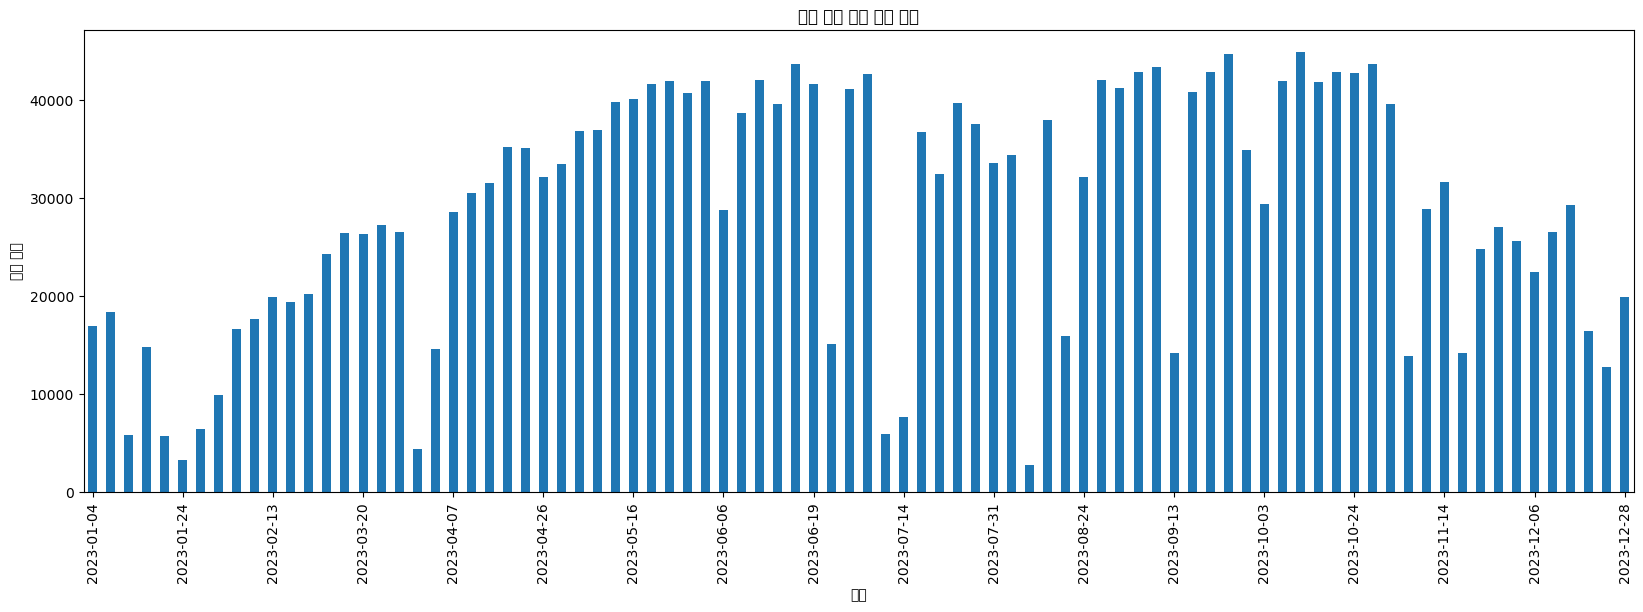

In [15]:
일별_데이터 = 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

눈금_간격 = 5  # 예시로 눈금 간격을 5로 설정
눈금_위치 = range(0, len(일별_데이터.index), 눈금_간격)
눈금_레이블 = 일별_데이터.index[::눈금_간격]

# 시작 대여소별 대여 건수 시각화
일별_데이터.plot(kind='bar',figsize=(20, 6))
plt.title('강서 지역 일별 대여 건수')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.xticks(눈금_위치, 눈금_레이블, rotation=90)

plt.show()


# 시간별 데이터 시각화

In [6]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00'
    elif time < 1600:
        return '10:00~16:00'
    elif time < 2000:
        return '16:00~20:00'
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()

print(강서_시간대별_건수)

시간대_구간
00:00~06:00    104216
06:00~10:00    639874
10:00~16:00    502497
16:00~20:00    805289
20:00~24:00    439450
Name: 전체_건수, dtype: int64


/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) mis

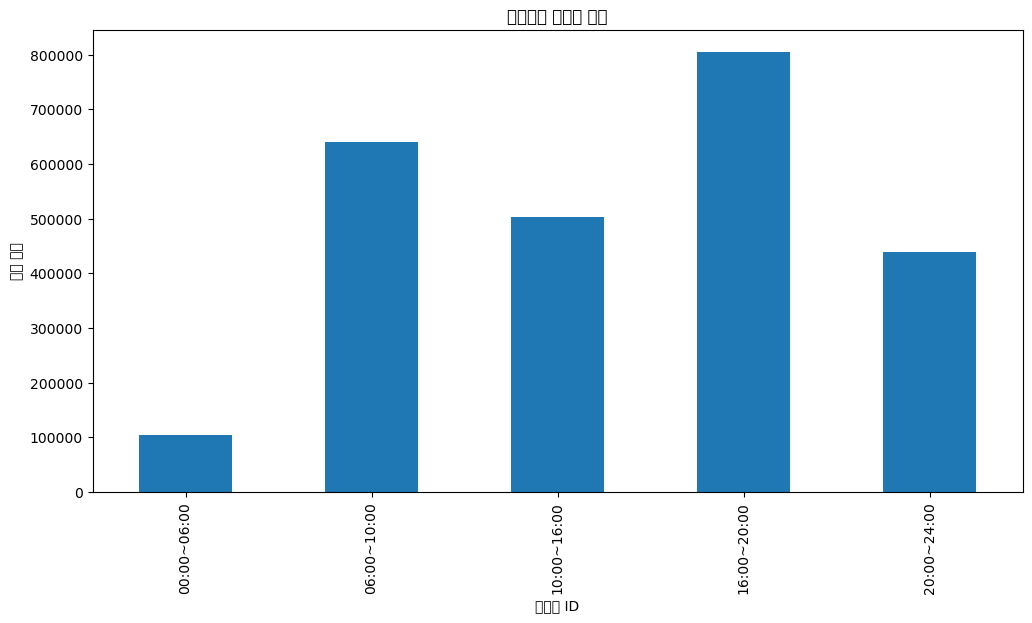

In [7]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

# 대여소 별 대여, 반납 비교

In [8]:
import matplotlib.pyplot as plt

# 시작 대여소별 전체 횟수 계산
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missin

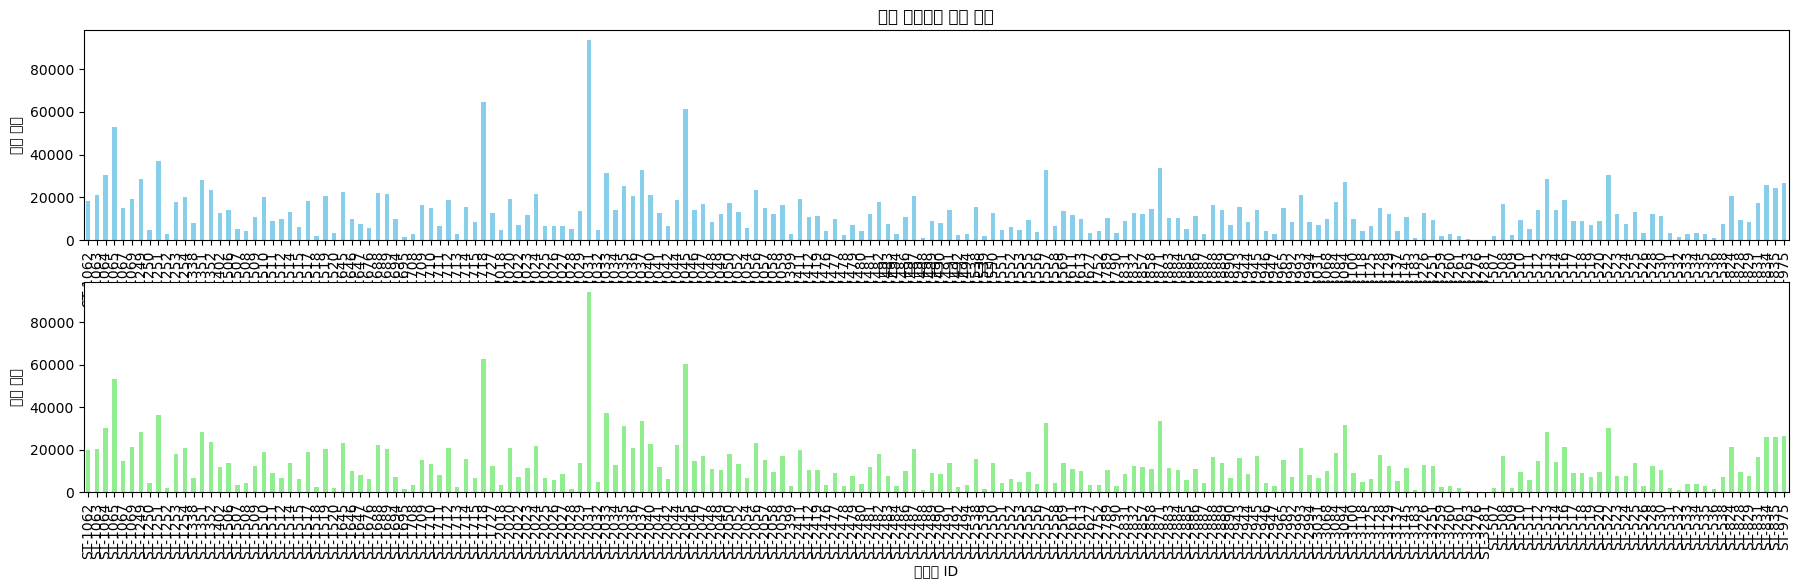

In [17]:
# 막대 그래프 그리기
plt.figure(figsize=(22, 6))

# 시작 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 1)
시작대여소별_전체횟수.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

# 종료 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 2)
종료대여소별_전체횟수.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ST-1063'),
  Text(1, 0, 'ST-1064'),
  Text(2, 0, 'ST-1065'),
  Text(3, 0, 'ST-1249'),
  Text(4, 0, 'ST-1251'),
  Text(5, 0, 'ST-1254'),
  Text(6, 0, 'ST-1351'),
  Text(7, 0, 'ST-1352'),
  Text(8, 0, 'ST-1510'),
  Text(9, 0, 'ST-1519'),
  Text(10, 0, 'ST-1645'),
  Text(11, 0, 'ST-1688'),
  Text(12, 0, 'ST-1689'),
  Text(13, 0, 'ST-1718'),
  Text(14, 0, 'ST-2024'),
  Text(15, 0, 'ST-2031'),
  Text(16, 0, 'ST-2033'),
  Text(17, 0, 'ST-2035'),
  Text(18, 0, 'ST-2036'),
  Text(19, 0, 'ST-2037'),
  Text(20, 0, 'ST-2040'),
  Text(21, 0, 'ST-2045'),
  Text(22, 0, 'ST-2056'),
  Text(23, 0, 'ST-2487'),
  Text(24, 0, 'ST-2557'),
  Text(25, 0, 'ST-2871'),
  Text(26, 0, 'ST-2993'),
  Text(27, 0, 'ST-3094'),
  Text(28, 0, 'ST-513'),
  Text(29, 0, 'ST-522'),
  Text(30, 0, 'ST-824'),
  Text(31, 0, 'ST-834'),
  Text(32, 0, 'ST-835'),
  T

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missin

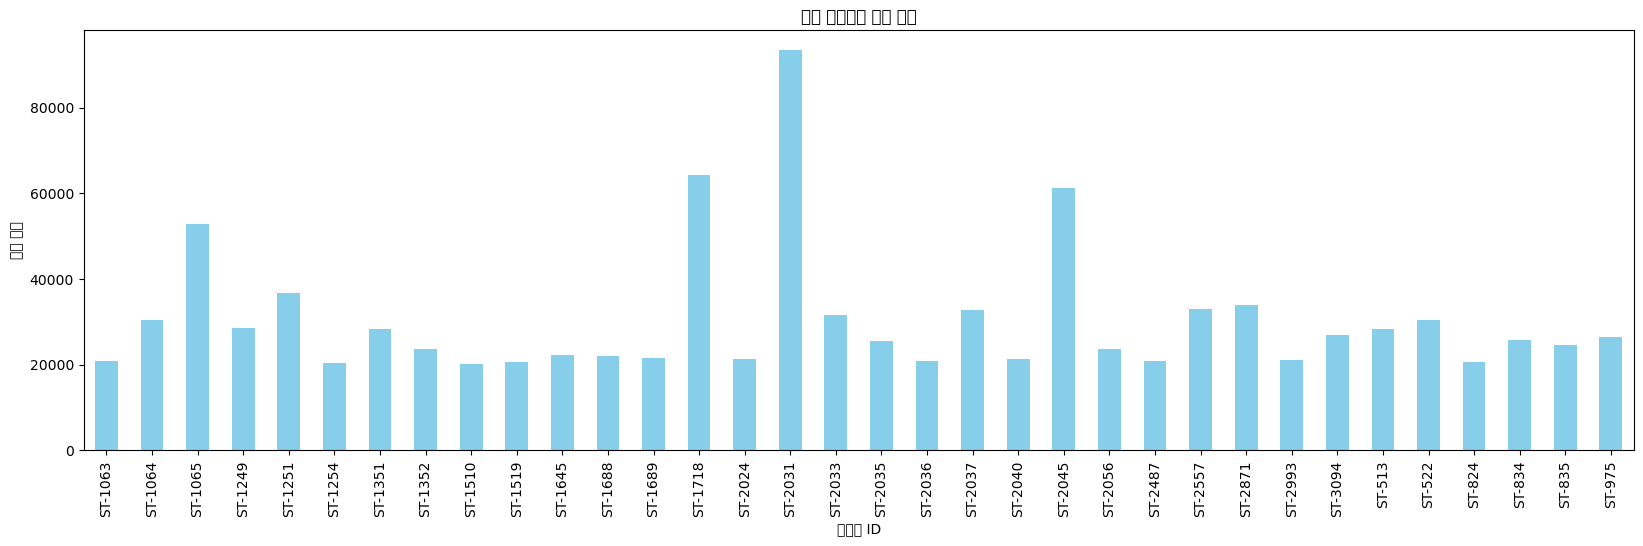

In [21]:
시작대여소_2= 시작대여소별_전체횟수[시작대여소별_전체횟수.values >= 20000]
종료대여소_2 = 종료대여소별_전체횟수[종료대여소별_전체횟수.values >= 20000]

# 그래프 그리기
plt.figure(figsize=(20, 12))

# 시작 대여소별 2만개 이상
plt.subplot(2, 1, 1)
시작대여소_2.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'ST-1063'),
  Text(1, 0, 'ST-1064'),
  Text(2, 0, 'ST-1065'),
  Text(3, 0, 'ST-1069'),
  Text(4, 0, 'ST-1249'),
  Text(5, 0, 'ST-1251'),
  Text(6, 0, 'ST-1254'),
  Text(7, 0, 'ST-1351'),
  Text(8, 0, 'ST-1352'),
  Text(9, 0, 'ST-1519'),
  Text(10, 0, 'ST-1645'),
  Text(11, 0, 'ST-1688'),
  Text(12, 0, 'ST-1689'),
  Text(13, 0, 'ST-1712'),
  Text(14, 0, 'ST-1718'),
  Text(15, 0, 'ST-2020'),
  Text(16, 0, 'ST-2024'),
  Text(17, 0, 'ST-2031'),
  Text(18, 0, 'ST-2033'),
  Text(19, 0, 'ST-2035'),
  Text(20, 0, 'ST-2036'),
  Text(21, 0, 'ST-2037'),
  Text(22, 0, 'ST-2040'),
  Text(23, 0, 'ST-2044'),
  Text(24, 0, 'ST-2045'),
  Text(25, 0, 'ST-2056'),
  Text(26, 0, 'ST-2487'),
  Text(27, 0, 'ST-2557'),
  Text(28, 0, 'ST-2871'),
  Text(29, 0, 'ST-2993'),
  Text(30, 0, 'ST-3094'),
  Text(31, 0, 'ST-513'),
 

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) miss

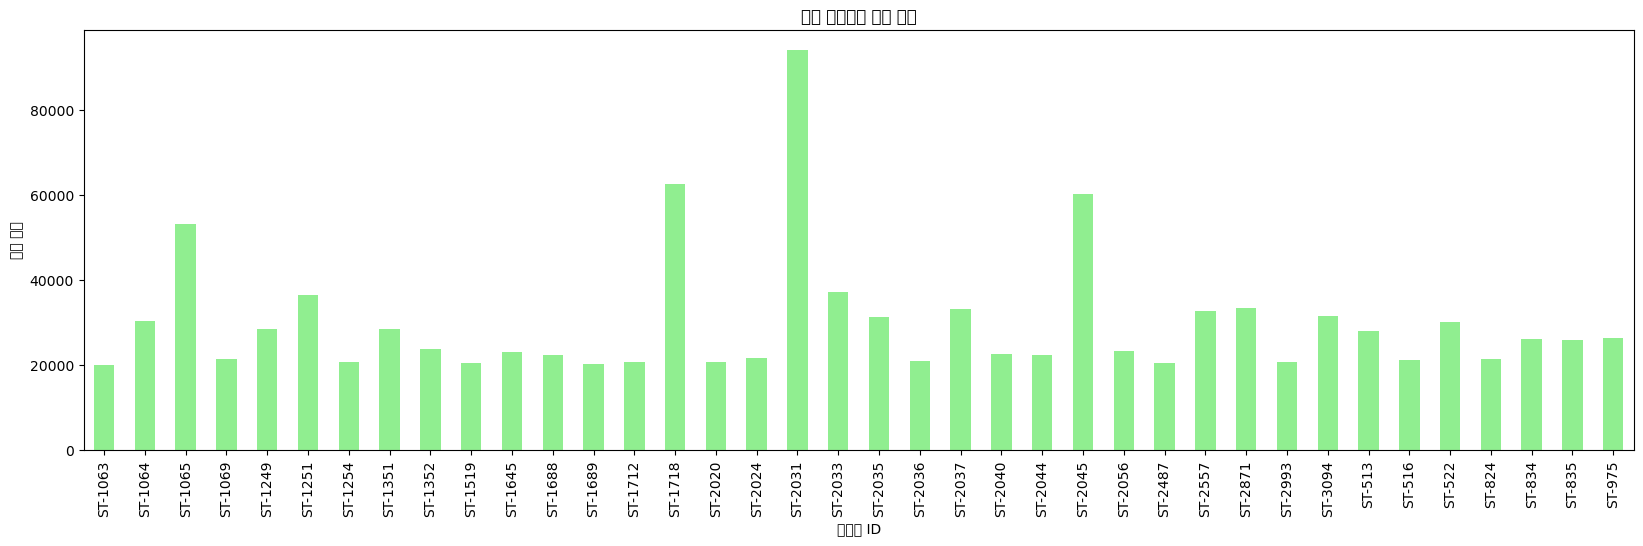

In [22]:
# 종료 대여소 2만개 이상
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 2)
종료대여소_2.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)